In [1]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Loading the data

In [4]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Presprocessing

In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df.dropna(axis=0,inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
df.shape

(20433, 10)

In [13]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

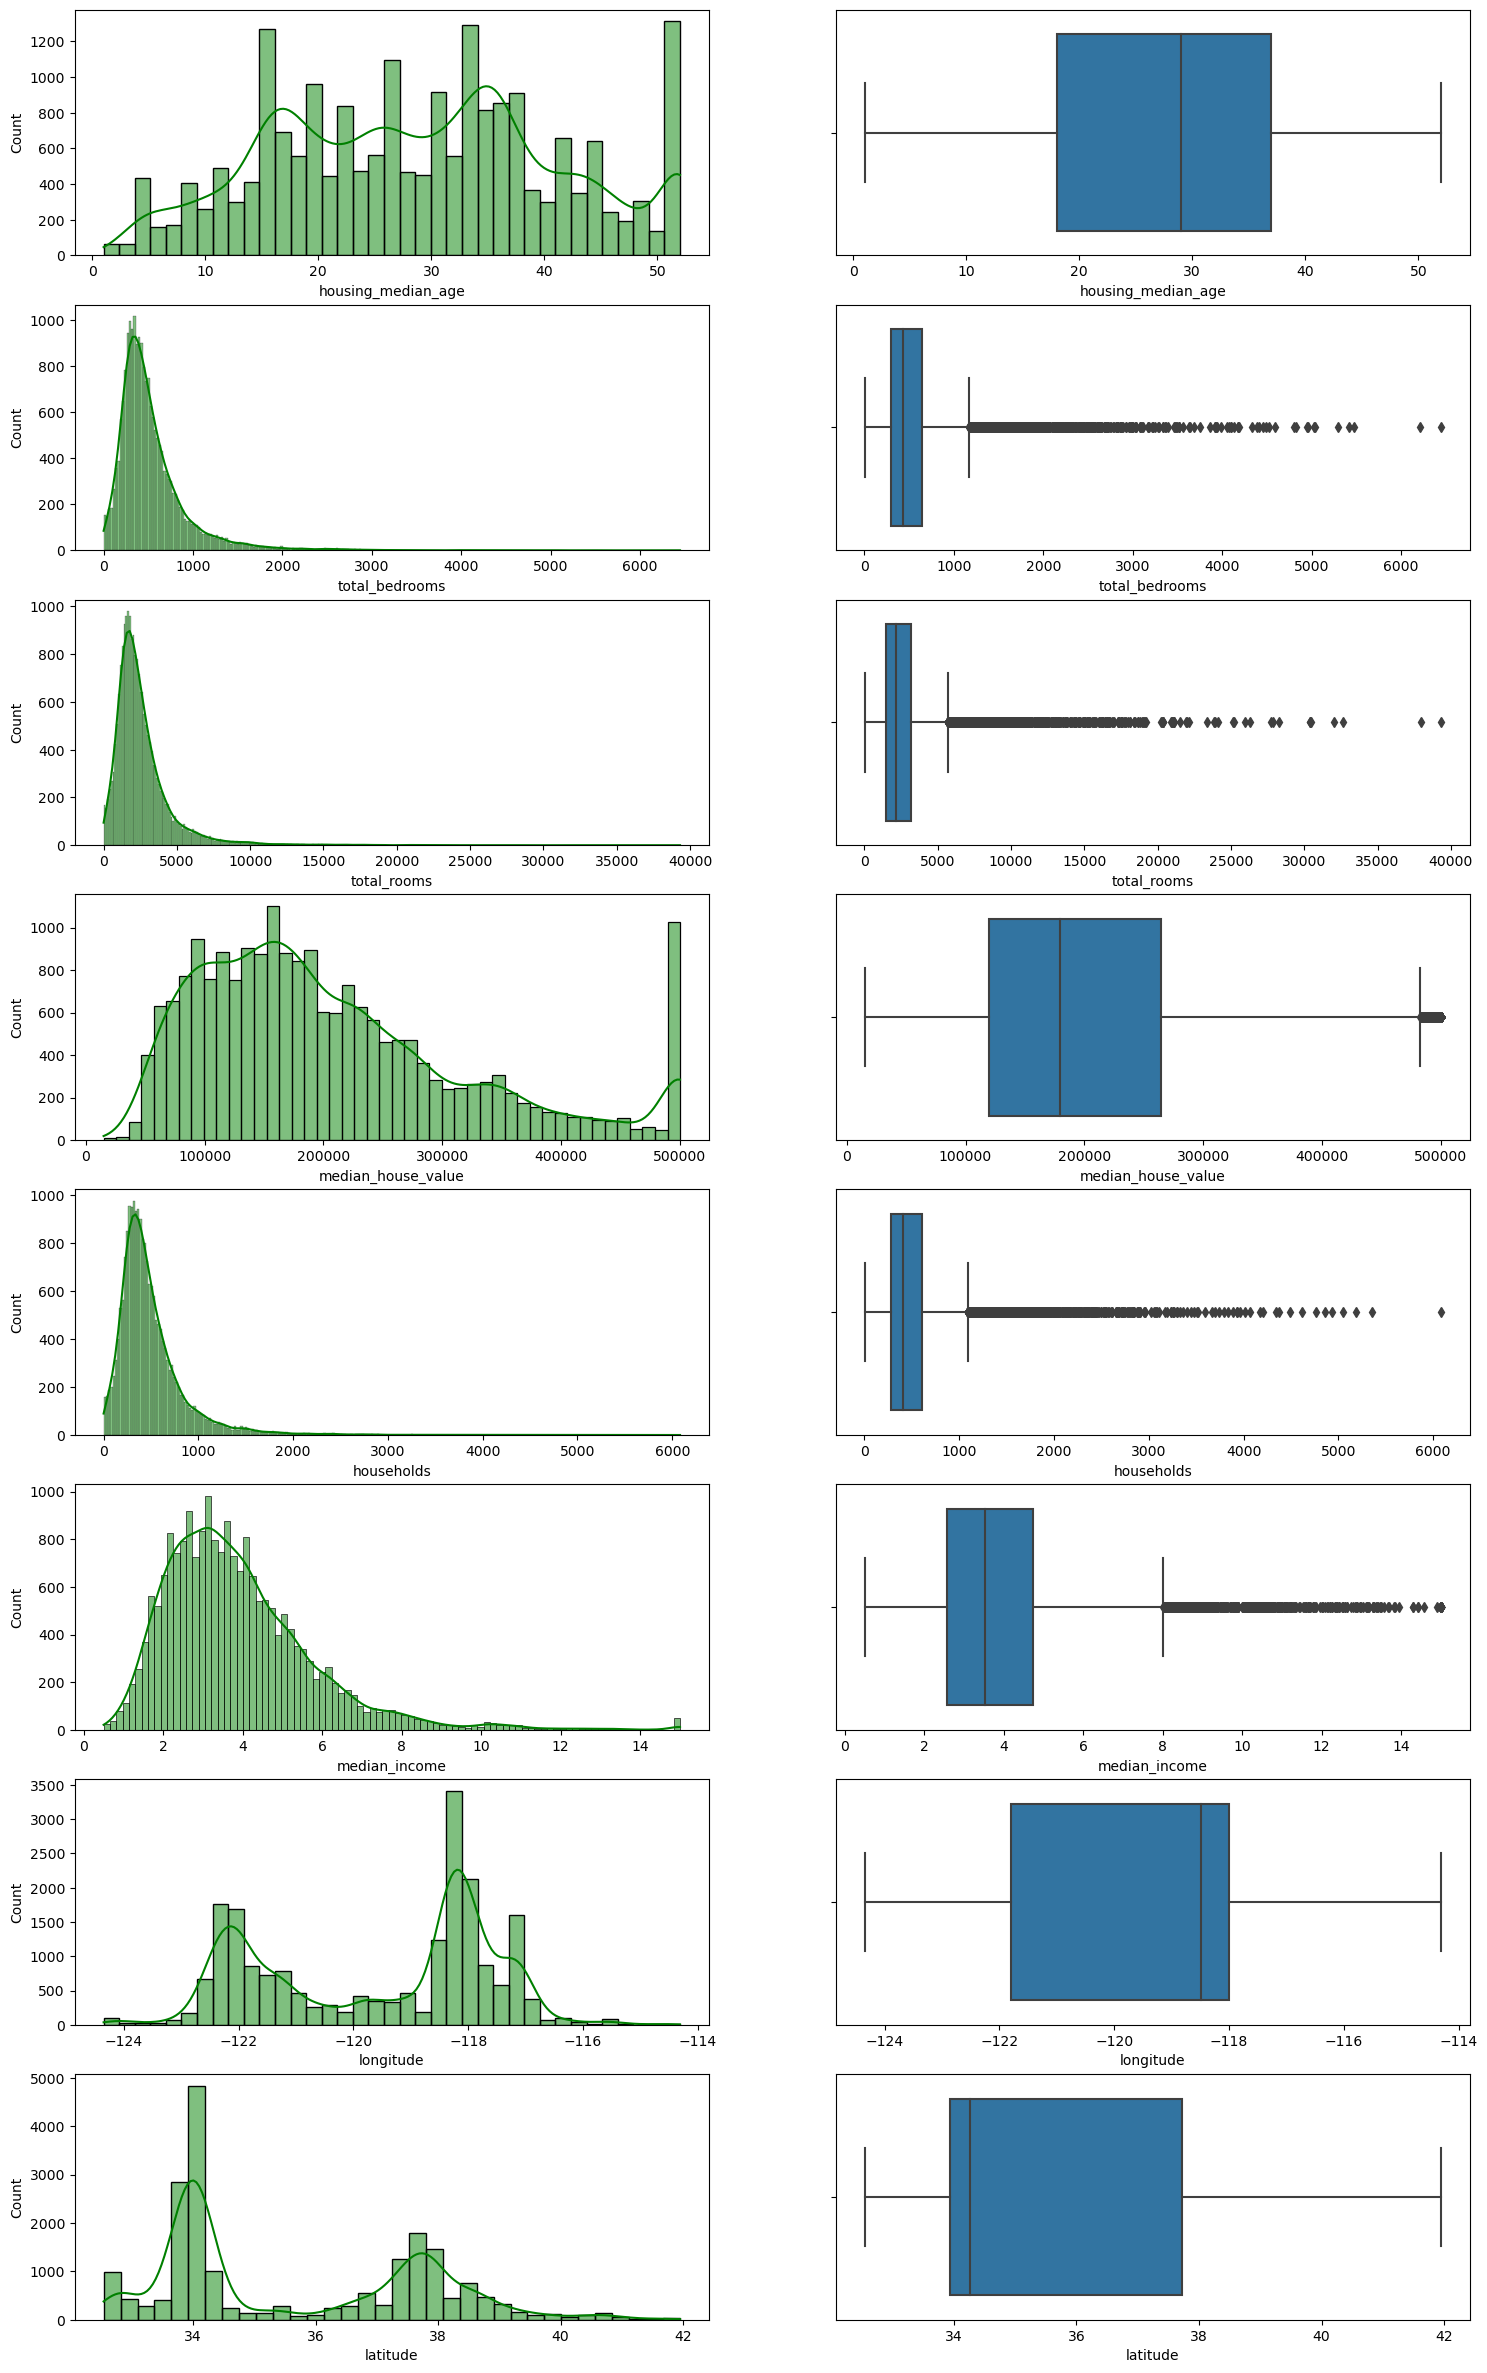

In [14]:
fig,axes = plt.subplots(nrows=8,ncols=2,figsize=(18,30))

#Plotting
sns.histplot(df['housing_median_age'],kde=True,ax=axes[0,0],color='g')
sns.boxplot(x=df['housing_median_age'],ax=axes[0,1])

sns.histplot(df['total_bedrooms'],kde=True,ax=axes[1,0],color='g')
sns.boxplot(x=df['total_bedrooms'],ax=axes[1,1])

sns.histplot(df['total_rooms'],kde=True,ax=axes[2,0],color='g')
sns.boxplot(x=df['total_rooms'],ax=axes[2,1])

sns.histplot(df['median_house_value'],kde=True,ax=axes[3,0],color='g')
sns.boxplot(x=df['median_house_value'],ax=axes[3,1])

sns.histplot(df['households'],kde=True,ax=axes[4,0],color='g')
sns.boxplot(x=df['households'],ax=axes[4,1])

sns.histplot(df['median_income'],kde=True,ax=axes[5,0],color='g')
sns.boxplot(x=df['median_income'],ax=axes[5,1])

sns.histplot(df['longitude'],kde=True,ax=axes[6,0],color='g')
sns.boxplot(x=df['longitude'],ax=axes[6,1])

sns.histplot(df['latitude'],kde=True,ax=axes[7,0],color='g')
sns.boxplot(x=df['latitude'],ax=axes[7,1])

plt.show()

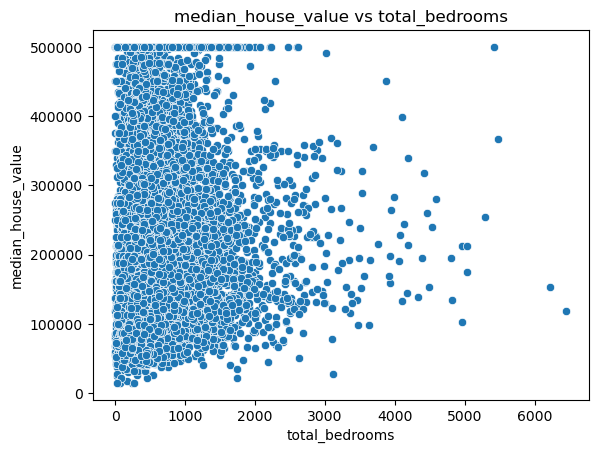

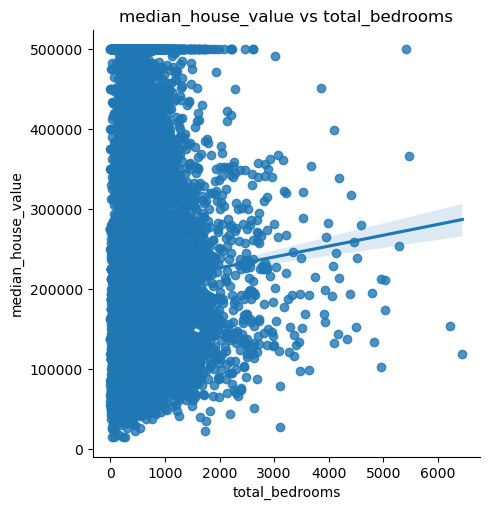

In [15]:
sns.scatterplot(x='total_bedrooms',y='median_house_value',data=df)
plt.title('median_house_value vs total_bedrooms')
plt.show()

sns.lmplot(x='total_bedrooms',y='median_house_value',data=df)
plt.title('median_house_value vs total_bedrooms')
plt.show()


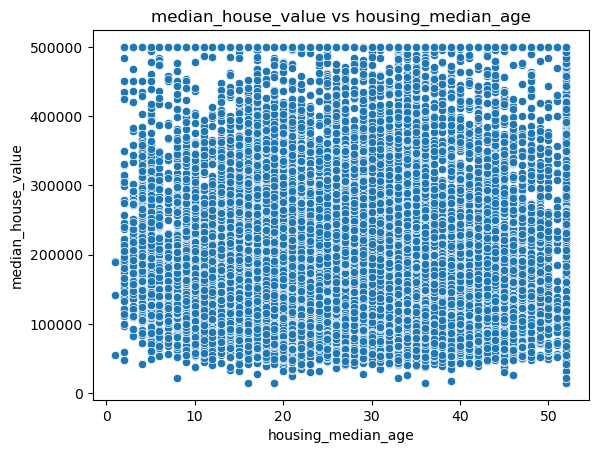

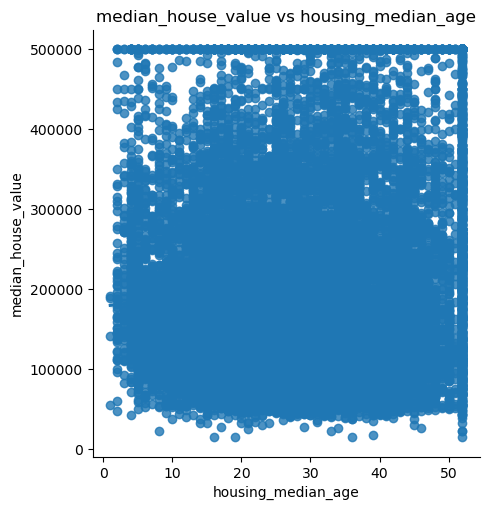

In [16]:
sns.scatterplot(x='housing_median_age',y='median_house_value',data=df)
plt.title('median_house_value vs housing_median_age')
plt.show()

sns.lmplot(x='housing_median_age',y='median_house_value',data=df)
plt.title('median_house_value vs housing_median_age')
plt.show()


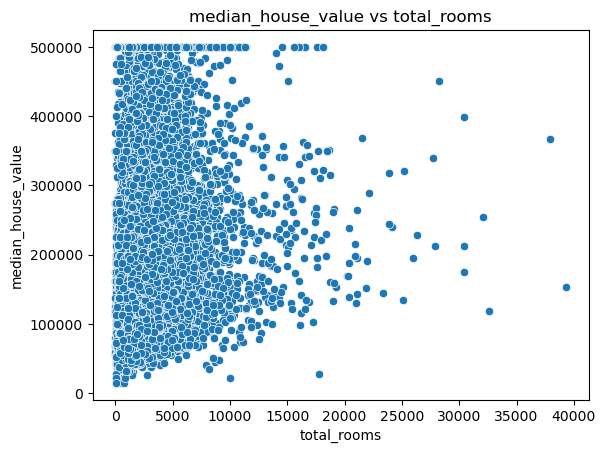

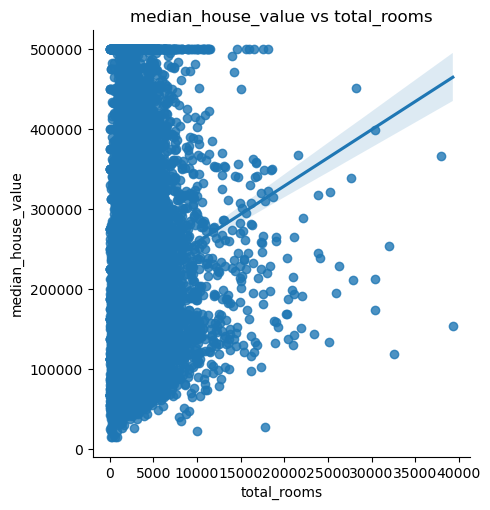

In [17]:
sns.scatterplot(x='total_rooms',y='median_house_value',data=df)
plt.title('median_house_value vs total_rooms')
plt.show()

sns.lmplot(x='total_rooms',y='median_house_value',data=df)
plt.title('median_house_value vs total_rooms')
plt.show()


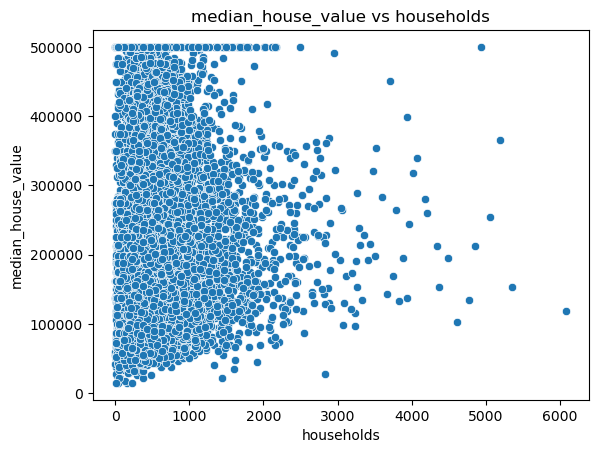

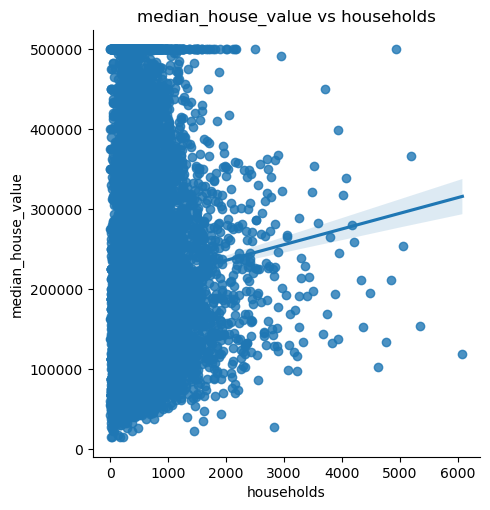

In [18]:
sns.scatterplot(x='households',y='median_house_value',data=df)
plt.title('median_house_value vs households')
plt.show()

sns.lmplot(x='households',y='median_house_value',data=df)
plt.title('median_house_value vs households')
plt.show()


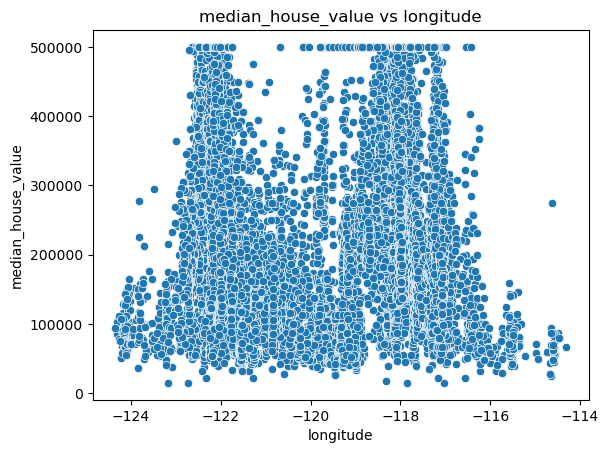

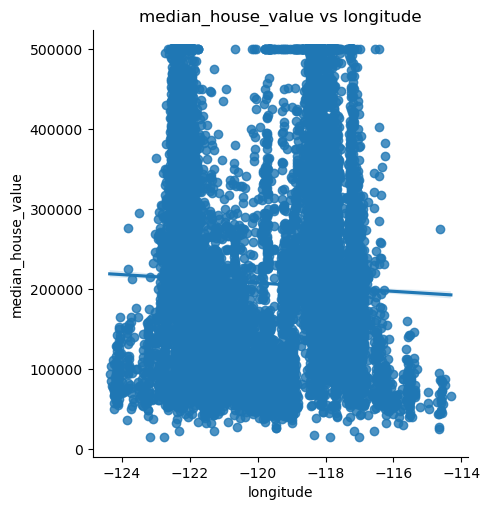

In [19]:
sns.scatterplot(x='longitude',y='median_house_value',data=df)
plt.title('median_house_value vs longitude')
plt.show()

sns.lmplot(x='longitude',y='median_house_value',data=df)
plt.title('median_house_value vs longitude')
plt.show()


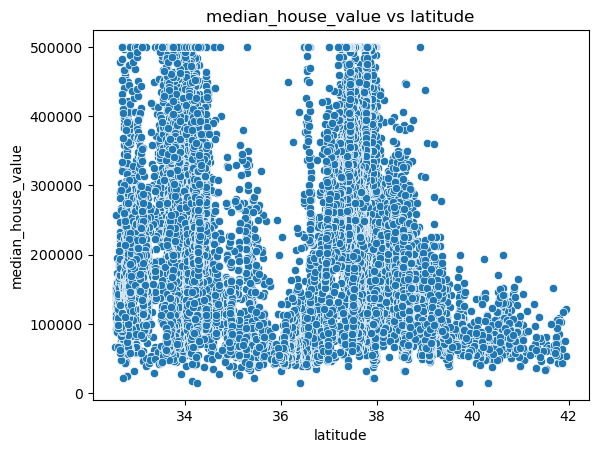

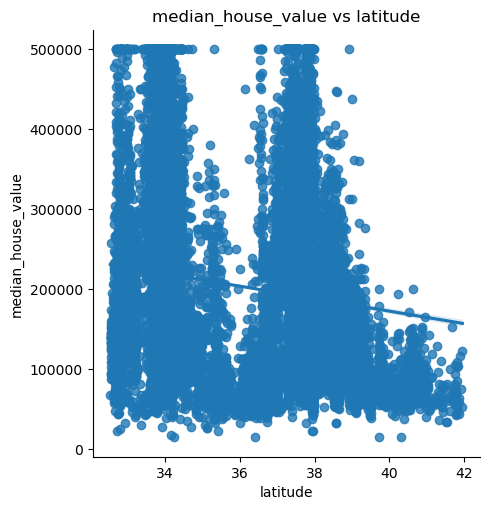

In [20]:
sns.scatterplot(x='latitude',y='median_house_value',data=df)
plt.title('median_house_value vs latitude')
plt.show()

sns.lmplot(x='latitude',y='median_house_value',data=df)
plt.title('median_house_value vs latitude')
plt.show()


# Encoding

In [21]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [22]:
df['ocean_proximity'] = df['ocean_proximity'].map({"<1H OCEAN":0,"INLAND":1,"NEAR OCEAN":2,
                                                   "NEAR BAY":3,"ISLAND":4})

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


#### After mapping, all the datatypes for columns are in numerical form now

## Train Test Split

In [25]:
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 9)
(4087, 9)
(16346,)
(4087,)


## Scaling 

In [28]:
mms = MinMaxScaler()

x_train = pd.DataFrame(mms.fit_transform(X_train))
x_test = pd.DataFrame(mms.transform(X_test))

In [29]:
model = Sequential()

model.add(Dense(1000, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

/Users/shoeb/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 660,951 (2.52 MB)

 Trainable params: 660,951 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
es = EarlyStopping(monitor='val_loss', mode= 'min', patience=50, restore_best_weights=True)

## Model Training and Evaluation

In [31]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[es],
                    epochs=25, batch_size=50, verbose=1)

Epoch 1/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 27820744704.0000 - mean_absolute_error: 128728.5000 - val_loss: 7411930624.0000 - val_mean_absolute_error: 68226.6250
Epoch 2/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6330292736.0000 - mean_absolute_error: 60116.0117 - val_loss: 5839728640.0000 - val_mean_absolute_error: 56649.7500
Epoch 3/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5690968064.0000 - mean_absolute_error: 55164.3633 - val_loss: 5490024960.0000 - val_mean_absolute_error: 54238.2188
Epoch 4/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5480427008.0000 - mean_absolute_error: 53243.4141 - val_loss: 5151905280.0000 - val_mean_absolute_error: 53381.6289
Epoch 5/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5103952896.0000 - mean_absolute_error: 51224.7344 - val_loss: 4832668672.0000 - val_mean_absolute_error: 49861.9180
Epoch 6/25
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4732288000.0000 - mean_absolute_error: 48836.4492 - val_lo

In [32]:
y_pred = model.predict(x_test)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step


In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.7059908519786551
MSE: 4020628251.9440417
MAE: 44115.29184830238


Text(0.5, 0, 'Epochs')

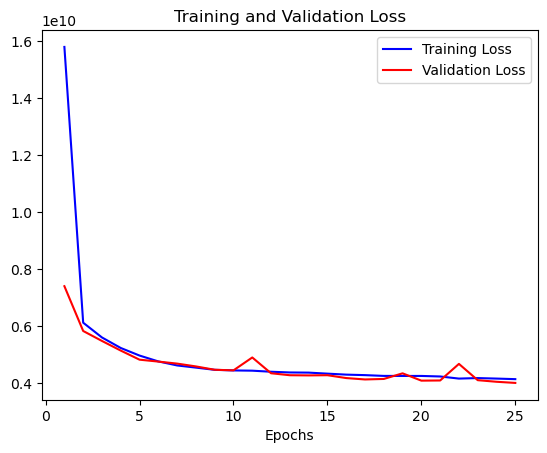

In [34]:
training_loss = history.history['loss']
validation_los = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_los, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.xlabel('Epochs')

In [36]:
import warnings
warnings.filterwarnings('ignore') 

## Prediction of House Price

In [41]:
import numpy as np

def pred(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population,
         households, median_income, ocean_proximity):
    # Creating the features array
    features = np.array([longitude, latitude, housing_median_age, total_rooms, total_bedrooms,
                         population, households, median_income, ocean_proximity]).reshape(1, -1)

    # Scaling the features
    features_scaled = mms.transform(features)  # Assuming mms is already fit on the training data

    # Predicting the result
    result = model.predict(features_scaled)

    return result[0]

# Define the input features
longitude = -121.70
latitude = 39.36
housing_median_age = 46.00
total_rooms = 1210.00
total_bedrooms = 243.00
population = 523.00
households = 242.00
median_income = 1.91
ocean_proximity = 1.00

# Predict the price
price = pred(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity)

# Print the predicted price
print(price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[63610.695]


In [42]:
price

array([63610.695], dtype=float32)

### Pricing value and other features from original dataset 

In [40]:
df.loc[1200]

longitude              -121.70
latitude                 39.36
housing_median_age       46.00
total_rooms            1210.00
total_bedrooms          243.00
population              523.00
households              242.00
median_income             1.91
median_house_value    63900.00
ocean_proximity           1.00
Name: 1200, dtype: float64

### We can see from the original dataset the price value is "63900.00"
### Our Prediction is "63610.695"